In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
import tensorflow as tf

2023-07-20 10:45:17.680854: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-20 10:45:17.754362: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-20 10:45:17.755333: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-20 10:45:19.022578: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [9]:
# We are going to use the inbuilt handwriten dataset from keras

In [10]:
(X_train, y_train),(X_test, y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [11]:
len(X_train)

60000

In [13]:
len(X_test)

10000

In [14]:
X_train.shape

(60000, 28, 28)

In [15]:
X_train[0].shape

(28, 28)

In [16]:
X_train[0] 

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

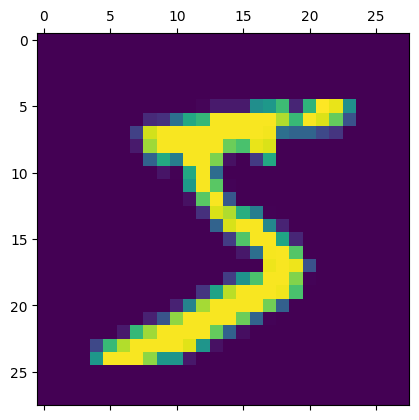

In [23]:
#plotting the  train sets (X_train images and their corresponding y_train labels using matplotlib)
plt.matshow(X_train[0]) # the first image in the training

In [25]:
y_train[0]

5

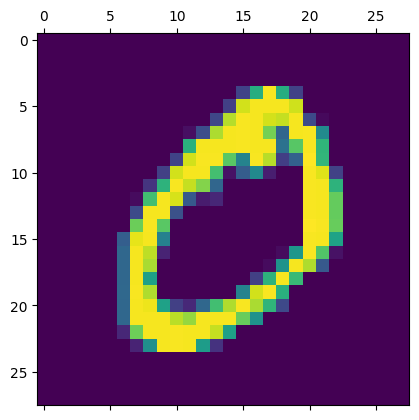

In [18]:
plt.matshow(X_train[1])

In [26]:
y_train[1]

0

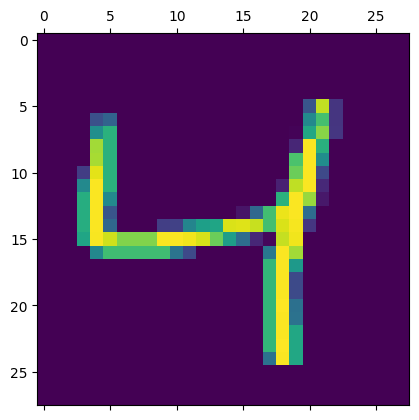

In [19]:
plt.matshow(X_train[2])

In [28]:
y_train[2]

4

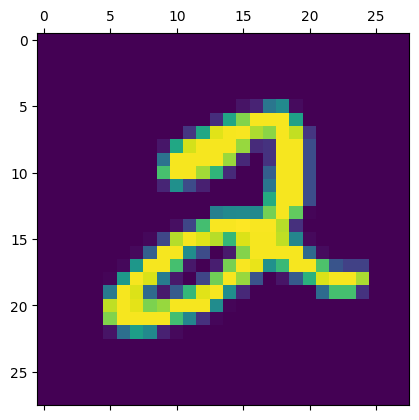

In [20]:
plt.matshow(X_train[5])

In [29]:
y_train[5]

2

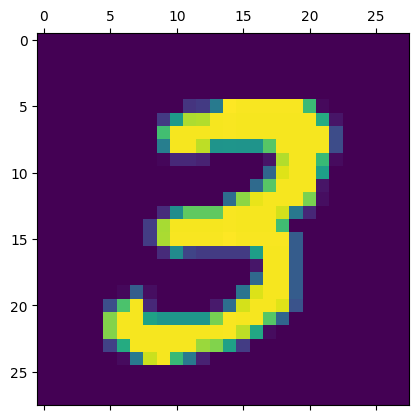

In [21]:
plt.matshow(X_train[7])

In [30]:
y_train[7]

3

In [43]:
y_train  # It contains numbers from 0 to 9 which are 10 unique numbers

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [53]:
len(np.unique(y_train))  # 10 elements

10

In [34]:
X_train.shape

(60000, 28, 28)

In [64]:
X_train = X_train / 255
X_test = X_test / 255

In [65]:
X_test.shape

(10000, 28, 28)

In [66]:
X_train_flattened = X_train.reshape(len(X_train),28*28)
X_test_flattened = X_test.reshape(len(X_test),28*28)

In [67]:
""" 
Note: 

We first turn from 3D to 2D using (len(X_train),28*28) then to 1D

The reason why we do flattening or reshaping  from  2D to 1D using X_train.reshape(len(X_train),28*28)

is because In deep learning models, dense (or fully connected) 
layers are common, where each neuron in a layer is connected to 
every neuron in the previous layer. For this to work, 
the input data must be in a flattened format.

"""

' \nNote: \n\nWe first turn from 3D to 2D using (len(X_train),28*28) then to 1D\n\nThe reason why we do flattening or reshaping  from  2D to 1D using X_train.reshape(len(X_train),28*28)\n\nis because In deep learning models, dense (or fully connected) \nlayers are common, where each neuron in a layer is connected to \nevery neuron in the previous layer. For this to work, \nthe input data must be in a flattened format.\n\n'

In [68]:
X_test_flattened.shape

(10000, 784)

In [69]:
X_train_flattened.shape

(60000, 784)

In [70]:
X_train[0] # before flattening it was 2D array

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000

In [71]:
X_train_flattened[0] # After flattening it had to become 1D array 

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

In [72]:
# the model 

"""

Note: The reason why we use Dense becaues every nueron in each layer is connected
with every other layer in the othe next layer

"""

'\n\nNote: The reason why we use Dense becaues every nueron in each layer is connected\nwith every other layer in the othe next layer\n\n'

In [169]:
model = tf.keras.Sequential([ 
    tf.keras.layers.Flatten(input_shape=(28,28)), # u can use the flatten method instead of manual flattening
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(50,activation="relu"),
    tf.keras.layers.Dense(25,activation="relu"),
    tf.keras.layers.Dense(10,activation="softmax")
])

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model.fit(X_train,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 9s 4ms/step - loss: 0.9709 - accuracy: 0.6610
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5545 - accuracy: 0.8315
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4528 - accuracy: 0.8673
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3812 - accuracy: 0.8907
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3140 - accuracy: 0.9093


In [170]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2856 - accuracy: 0.9184


[0.28560298681259155, 0.91839998960495]

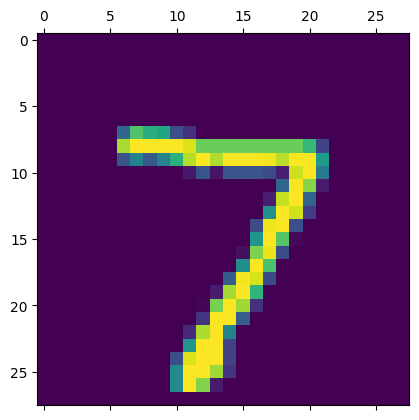

In [172]:
plt.matshow(X_test[0])

In [173]:
predictions = model.predict(X_test)

313/313 [==============================] - 1s 4ms/step


In [174]:
predictions[0]

array([1.3543546e-05, 1.8360248e-06, 2.2773711e-04, 1.2692141e-02,
       4.3542337e-07, 1.2422598e-04, 1.2667985e-10, 9.7567677e-01,
       7.7094428e-06, 1.1255489e-02], dtype=float32)

In [175]:
# to find the maximum value using numpy and predicting using predictions

np.argmax(predictions[0])

7

In [176]:
# Predicting another image 

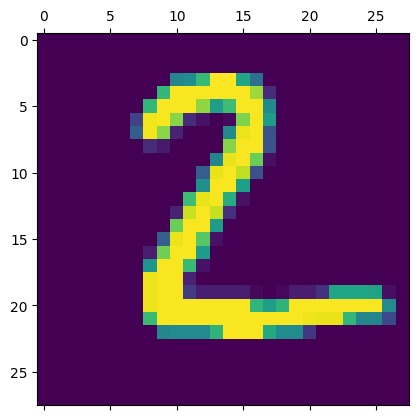

In [177]:
plt.matshow(X_test[1])

In [178]:
np.argmax(predictions[1])

2

In [179]:
# Building a confusion matrix Using Tensorflow


"""
Note: 
To do this we need to convert the predictions into concrete class labels
Because if you are to look at the predictions i.e array([[0.31685892, 0.3947925 , 
        0.3509681 , ..., 0.8089287 , 0.37493658,
        0.58638823],
       [0.38934505, 0.4070031 , 0.61251605, ..., 0.15534209, 0.3973751 ,
        0.18139635],
       [0.27792028, 0.8196805 , 0.458445  , ..., 0.50509113, 0.42098466,
        0.43347836],
       ..., etc ...

they are in float and unlabelled.

But when you look at the y_test i.e array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

they are labelled.

So for them to match such that the confusion matrix can be formulated you do the above

using the code in the next cell

"""

'\nNote: \nTo do this we need to convert the predictions into concrete class labels\nBecause if you are to look at the predictions i.e array([[0.31685892, 0.3947925 , \n        0.3509681 , ..., 0.8089287 , 0.37493658,\n        0.58638823],\n       [0.38934505, 0.4070031 , 0.61251605, ..., 0.15534209, 0.3973751 ,\n        0.18139635],\n       [0.27792028, 0.8196805 , 0.458445  , ..., 0.50509113, 0.42098466,\n        0.43347836],\n       ..., etc ...\n\nthey are in float and unlabelled.\n\nBut when you look at the y_test i.e array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)\n\nthey are labelled.\n\nSo for them to match such that the confusion matrix can be formulated you do the above\n\nusing the code in the next cell\n\n'

In [180]:
y_predicted_labels = [np.argmax(i) for i in predictions] # Creating an array out of existing array
y_predicted_labels[:5]  

[7, 2, 1, 0, 4]

In [181]:
y_test[:5]  # the first five predictions are now matching with the first five y_test (truth data)

array([7, 2, 1, 0, 4], dtype=uint8)

In [182]:
cm = tf.math.confusion_matrix(y_test,y_predicted_labels)

cm  # this is the confusion matrix but you can put it in an appealing way as shown in the next cell

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 962,    0,    3,    1,    1,    4,    5,    2,    2,    0],
       [   0, 1095,    6,    3,    2,    1,    3,    1,   24,    0],
       [  10,    3,  943,   23,    5,    3,   13,    6,   22,    4],
       [   2,    0,   38,  888,    1,   29,    1,   13,   29,    9],
       [   2,    1,    5,    0,  921,    0,   12,    2,    6,   33],
       [  15,    1,    7,   47,    9,  760,   17,    1,   23,   12],
       [  17,    3,    7,    0,    9,    9,  907,    0,    6,    0],
       [   2,   17,   19,   14,    4,    1,    0,  924,    2,   45],
       [   7,    5,    5,   20,   15,   28,   17,    1,  853,   23],
       [  11,    2,    2,   11,   29,    5,    0,   11,    7,  931]],
      dtype=int32)>

Text(95.72222222222221, 0.5, 'Truth-y_test')

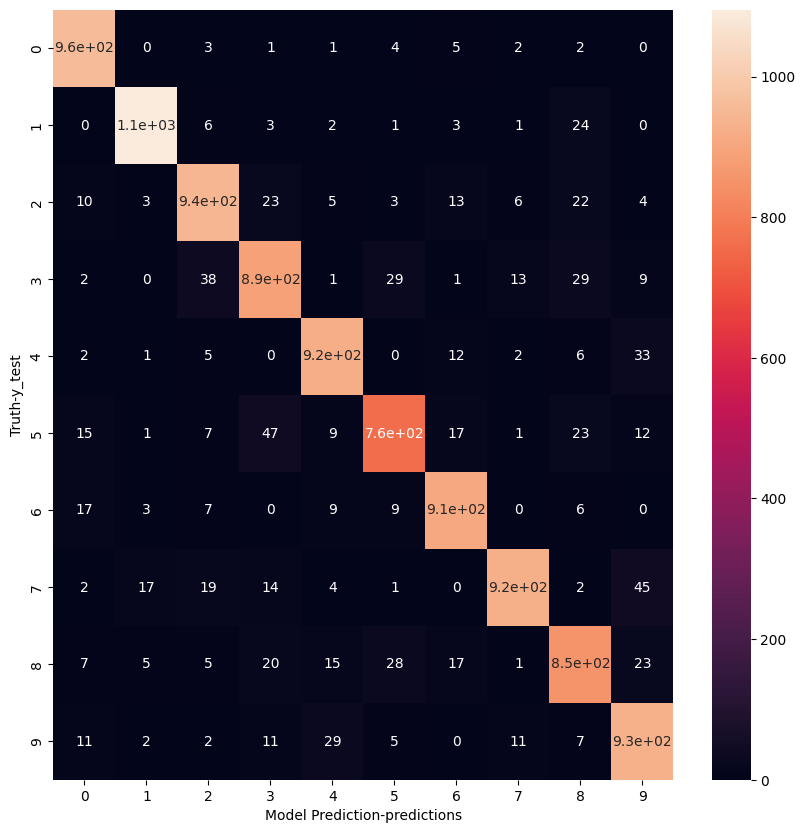

In [183]:
plt.figure(figsize=(10,10))
sns.heatmap(cm,annot=True)
plt.xlabel('Model Prediction-predictions')
plt.ylabel('Truth-y_test')